In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv("..\data_25\Round2\prices_round_2_day_-1.csv", sep=';')
print(df.head())

   day  timestamp         product  bid_price_1  bid_volume_1  bid_price_2  \
0   -1          0      CROISSANTS         4304           112          NaN   
1   -1          0            JAMS         6670            66       6669.0   
2   -1          0       SQUID_INK         2005             1       2002.0   
3   -1          0  PICNIC_BASKET1        59284            20      59283.0   
4   -1          0  PICNIC_BASKET2        30606            20      30605.0   

   bid_volume_2  bid_price_3  bid_volume_3  ask_price_1  ask_volume_1  \
0           NaN          NaN           NaN         4305           112   
1         137.0          NaN           NaN         6671            66   
2          31.0          NaN           NaN         2006            31   
3          18.0          NaN           NaN        59294             2   
4          18.0          NaN           NaN        30612            20   

   ask_price_2  ask_volume_2  ask_price_3  ask_volume_3  mid_price  \
0          NaN           NaN

In [24]:
df_c = df.query("product == 'CROISSANTS'")
df_d = df.query("product == 'DJEMBES'")
df_j = df.query("product == 'JAMS'")
df_B1 = df.query("product == 'PICNIC_BASKET1'")
df_B2 = df.query("product == 'PICNIC_BASKET2'")

# Compare Basket 2 to its components

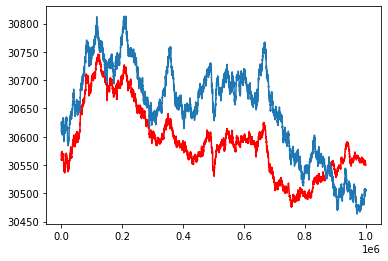

In [25]:
plt.plot(df_c["timestamp"], 4 * df_c["mid_price"].to_numpy() + 2 * df_j["mid_price"].to_numpy(), color='r')
plt.plot(df_B2["timestamp"], df_B2["mid_price"])

-21.5801 32.141790700581694


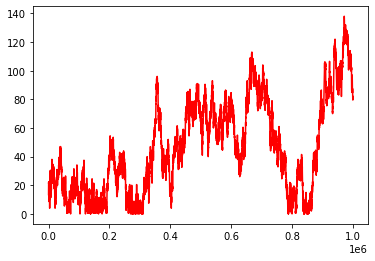

In [26]:
diff2 =  4 * df_c["mid_price"].to_numpy() + 2 * df_j["mid_price"].to_numpy() - df_B2["mid_price"].to_numpy() + 36.5
plt.plot(df_c["timestamp"],abs(diff2), color='r')
print(np.mean(diff2), np.std(np.abs(diff2)))

# Compare Basket 1 to its components

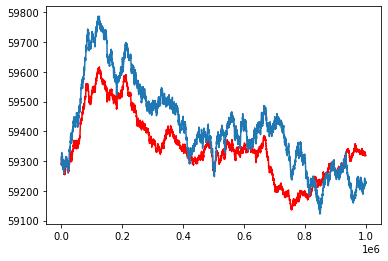

In [27]:
basket1_const = 6 * df_c["mid_price"].to_numpy() + 3 * df_j["mid_price"].to_numpy() + df_d["mid_price"].to_numpy()
plt.plot(df_c["timestamp"], basket1_const, color='r')
plt.plot(df_B1["timestamp"], df_B1["mid_price"])

89.9895


(None, 54.736390909065314)

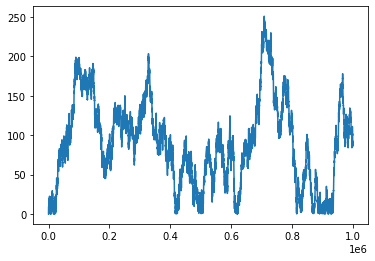

In [28]:
diff1 = basket1_const - df_B1["mid_price"]
plt.plot(df_B1["timestamp"],np.abs(diff1))

print(np.mean(abs(diff1))), np.std(abs(diff1))

# Minimal Croissant Hedge

In [29]:
from scipy.optimize import minimize

In [43]:
def spread_variance(weights):
    spread = weights[0] * basket1 - weights[1] * basket2
    return np.var(spread)

def croissant_exposure(weights):
    return abs(np.dot(weights, croissant_weights))

# Combined target: tradeoff between variance and croissant exposure
def objective(weights, alpha=0.5):
    return alpha * spread_variance(weights) + (1 - alpha) * croissant_exposure(weights)


In [32]:
basket1 = df_B1["mid_price"].to_numpy()
basket2 = df_B2["mid_price"].to_numpy()

Optimale Gewichte (Basket 1, Basket 2): [1.49976751]
Croissant-Exposure: [0.00092996]


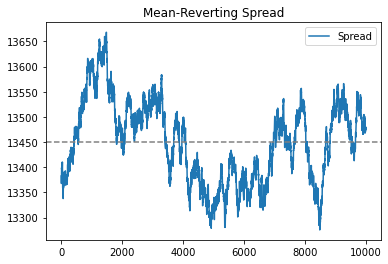

In [54]:

def spread(w2):
    return basket1 - w2*basket2

def spread_var(w2):
    return np.var(spread(w2))

def croissant_exposure(w2):
    return abs(6 + 4*w2)  # ← neue Gewichtung

# Kombinierte Zielfunktion
def objective(w2, alpha=0.8):
    weights = [1, w2]
    return alpha * spread_var(w2) + (1 - alpha) * croissant_exposure(w2)

w0 = [1.0, 1.0]
bounds = [(0, None)]

res = minimize(objective, x0=1, bounds=bounds)

print("Optimale Gewichte (Basket 1, Basket 2):", res.x)
print("Croissant-Exposure:", 6 - 4*res.x)

# Visualisierung des Spreads
plt.plot(spread(res.x), label="Spread")
plt.axhline(np.mean(spread(res.x)), color='gray', linestyle='--')
plt.title("Mean-Reverting Spread")
plt.legend()
plt.show()

# Analysis of optimized portfolio

In [69]:
price_opt = 2 * basket1 - 3 * basket2

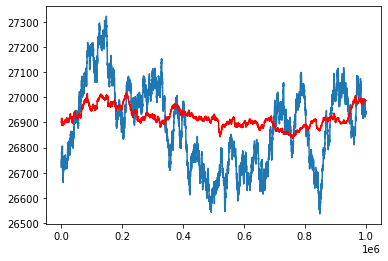

In [70]:
plt.plot(df_B1["timestamp"],price_opt)
plt.plot(df_d["timestamp"], 2 * df_d["mid_price"].to_numpy(), color='r')